<a href="https://colab.research.google.com/github/riponalmamun/MangoLeafBD/blob/main/MangoLeafBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming dataset is in 'data_dir'
data_dir = '/content/drive/MyDrive/MangoLeafBD Dataset'


Mounted at /content/drive


# Function to load images and labels

In [3]:
def load_images_labels(data_dir):
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))
            images.append(img)
            labels.append(category)
    return np.array(images), np.array(labels)

# Load data

In [4]:
images, labels = load_images_labels(data_dir)

# EDA: Data Overview

In [5]:
print(f"Total Images: {images.shape[0]}")
print(f"Image Dimensions: {images.shape[1:]}")
print(f"Unique Labels: {np.unique(labels)}")

Total Images: 4000
Image Dimensions: (100, 100, 3)
Unique Labels: ['Anthracnose' 'Bacterial Canker' 'Cutting Weevil' 'Die Back' 'Gall Midge'
 'Healthy' 'Powdery Mildew' 'Sooty Mould']


# EDA: Class Distribution

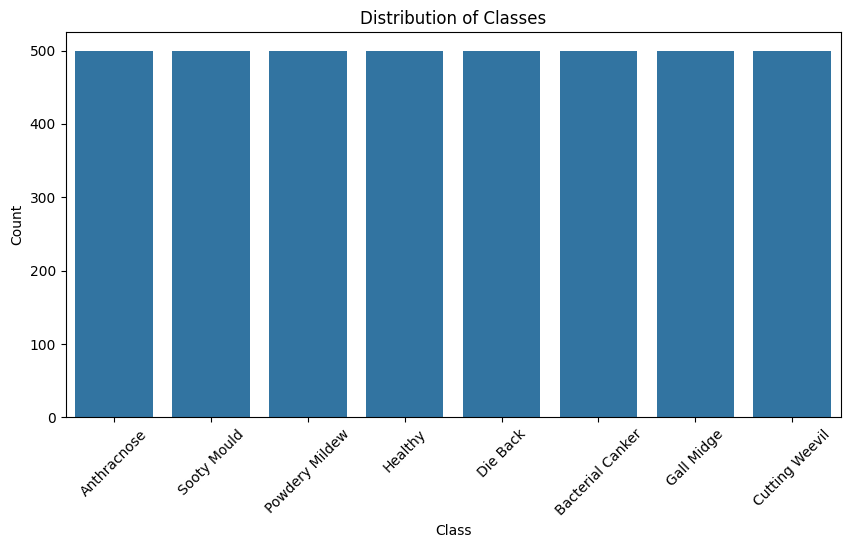

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=labels)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# EDA: Sample Visualization

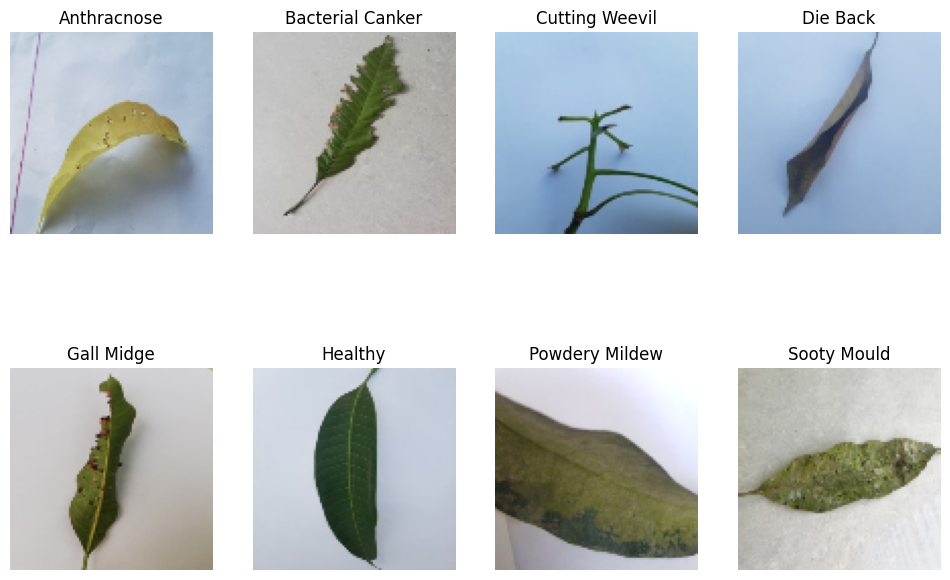

In [7]:
def display_samples(images, labels):
    plt.figure(figsize=(12, 8))
    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        plt.subplot(2, 4, i+1)
        idx = np.where(labels == label)[0][0]
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
    plt.show()

display_samples(images, labels)

# Data Preprocessing

Normalize images

In [8]:
images = images / 255.0

Encoding labels

In [9]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images.reshape(images.shape[0], -1),encoded_labels,test_size=0.2,random_state=42)

# Model 1: Decision Tree

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Model 2: Random Forest

In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation

In [13]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.68      0.62      0.65       123
Bacterial Canker       0.77      0.72      0.75        90
  Cutting Weevil       0.90      0.98      0.94        93
        Die Back       0.79      0.84      0.81       104
      Gall Midge       0.51      0.59      0.55        91
         Healthy       0.65      0.60      0.63       101
  Powdery Mildew       0.71      0.64      0.67       112
     Sooty Mould       0.42      0.45      0.44        86

        accuracy                           0.68       800
       macro avg       0.68      0.68      0.68       800
    weighted avg       0.68      0.68      0.68       800


Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.93      0.90      0.91       123
Bacterial Canker       0.89      0.84      0.87        90
  Cutting Weevil       0.99      1.00      0.99    

# Accuracy Comparison

In [14]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Decision Tree Accuracy: 0.68
Random Forest Accuracy: 0.90


# Plot accuracy comparison

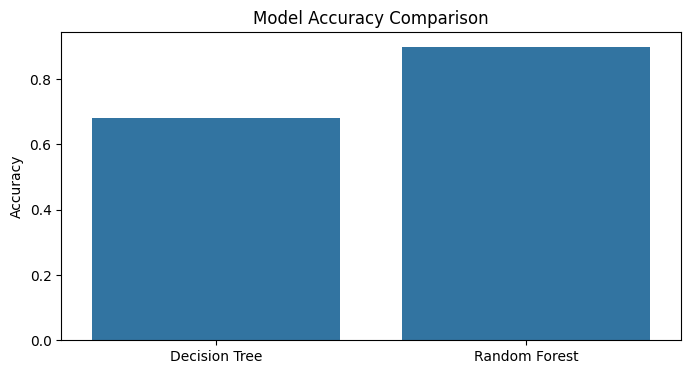

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[accuracy_dt, accuracy_rf])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Train the Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load sample dataset (replace with your own data)
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Initialize and train the model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for simplicity
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

#Visualize the Decision Tree

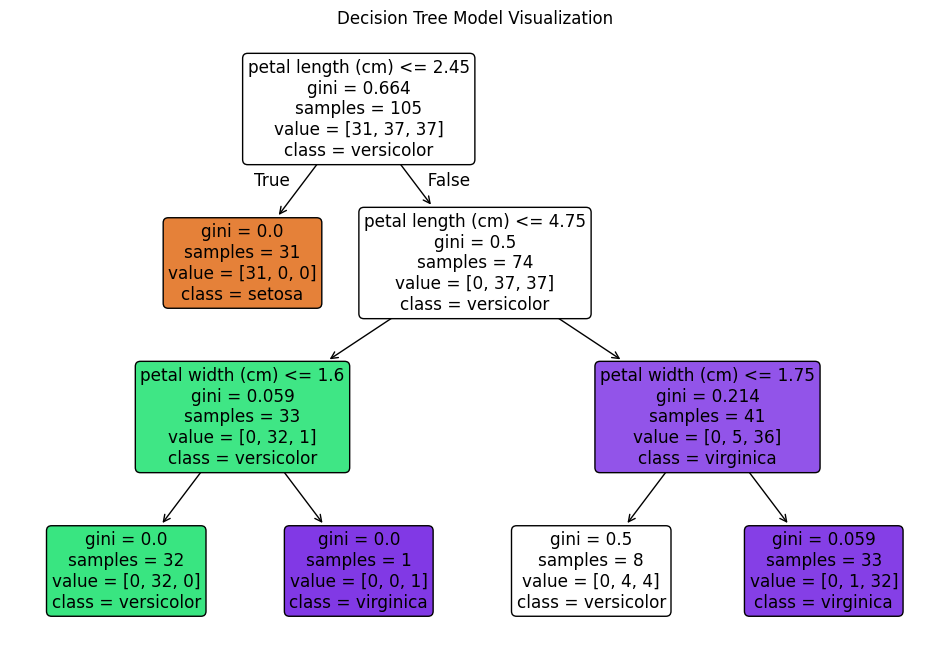

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Model Visualization")
plt.show()


# Confusion Matrix

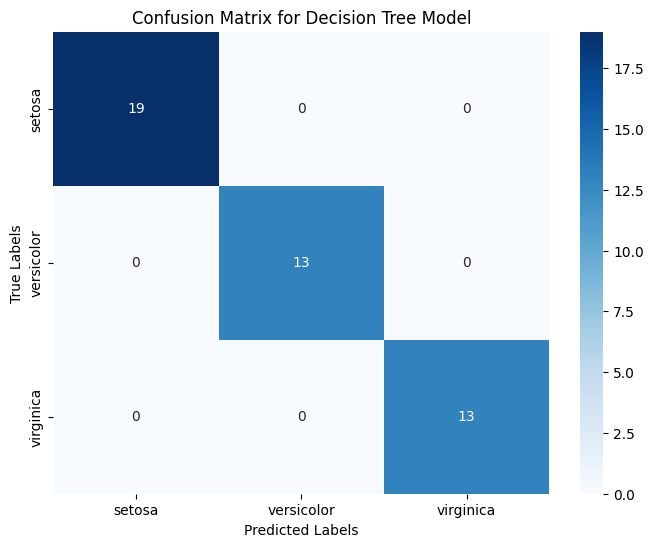

In [23]:
# Predict labels for the test set
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()


# Learning Curve Analysis

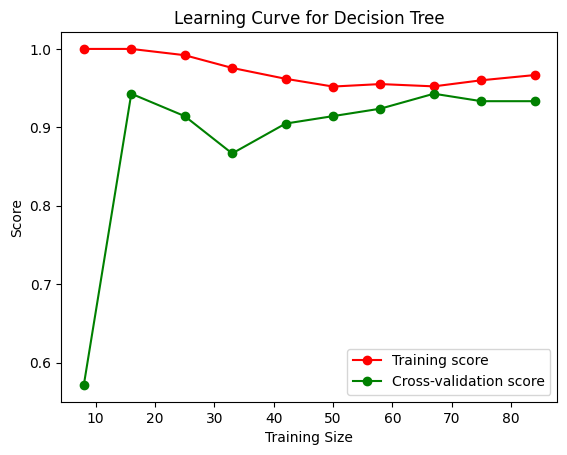

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve for Decision Tree")
plt.show()


# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9428571428571428
